# SCRIPT FOR CORRELATION OF YIELD TO PARAMETERS

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [46]:
# Graphing parameters
#sns.set(style="white")
rc = {'figure.figsize':(5,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Arial',
      'font.size' : 15,
      'figure.dpi':300}

plt.rcParams.update(rc)

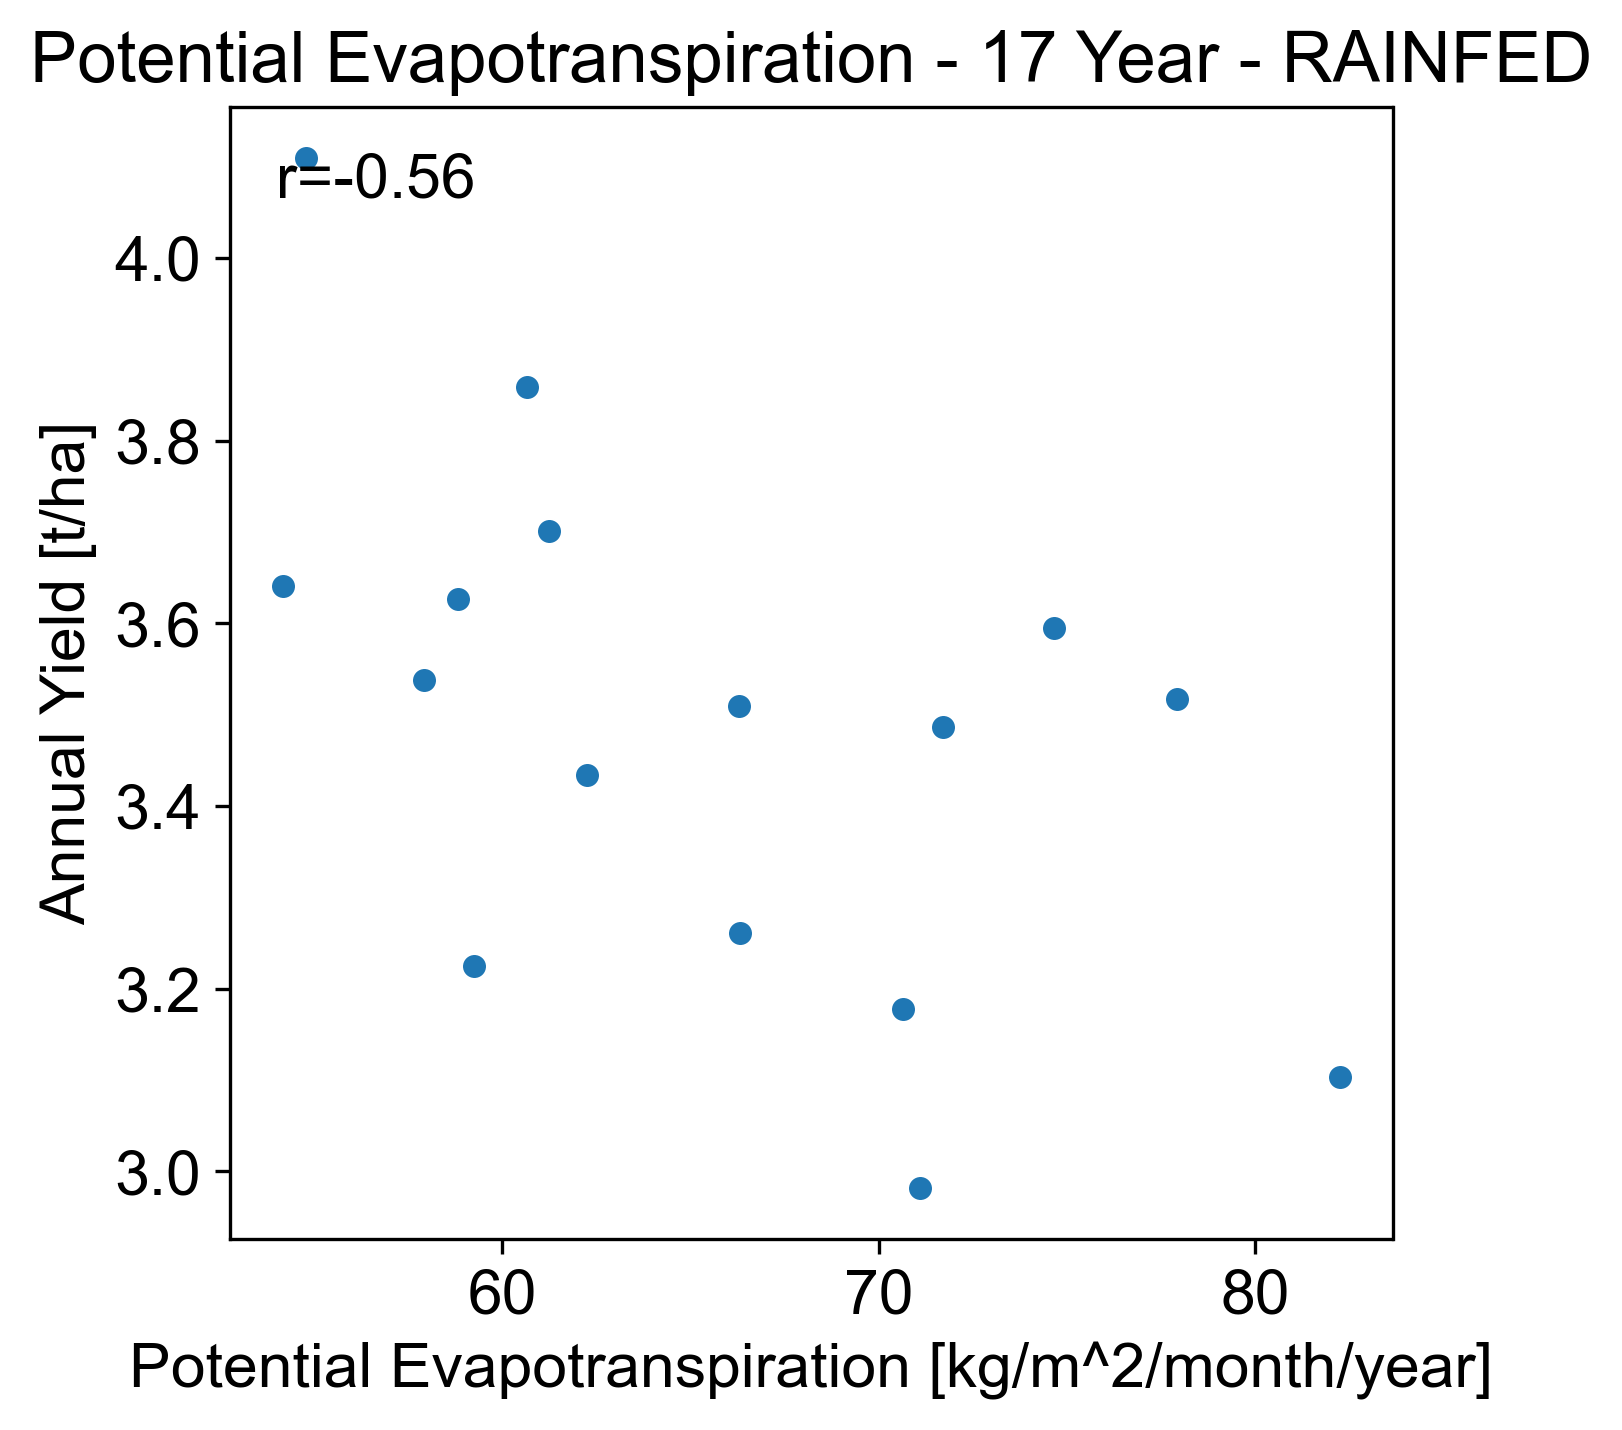

In [56]:
dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed.csv')
zonalStats = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ZonalSt_rf_ws_PET.csv', na_values='#NUM!')
yieldData = dataOfficial[(dataOfficial.param == 'yield') & (dataOfficial.ecosystem == 'rf')].reset_index(drop=True)
yieldData = yieldData[(yieldData.year <= 2017) & (yieldData.year >= 2001)].reset_index(drop=True).groupby('muni').mean()
merged = pd.merge(yieldData, zonalStats, left_on='muni', right_on='ADM3_EN')
merged.dropna(inplace=True)

corr = merged.loc[:,['value','MEAN']].corr().unstack().sort_values(kind="quicksort")[0] # Get the correlation coefficient
g = sns.scatterplot(x="MEAN", y="value", data=merged, 
               #fit_reg=True, palette='Set1', legend_out=False, height=7, aspect=1
               );
plt.title('Potential Evapotranspiration - 17 Year - RAINFED', fontsize=17)
g.set_xlabel('Potential Evapotranspiration [kg/m^2/month/year]')
g.set_ylabel('Annual Yield [t/ha]')
g.text(.04,.92, "r={:.2f}".format(corr), transform=plt.gca().transAxes)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.show()